<a href="https://colab.research.google.com/github/rehmanaly0051/Pytorch-DeepLearning/blob/main/Pytorch_for_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTORCH Workflow**
## https://www.learnpytorch.io/01_pytorch_workflow/

In [106]:
covering = {1: 'data(prepare and load)',
            2: 'build model',
            3: 'fitting the model to data(training)',
            4: 'make predictions and evaluating the model',
            5: 'savig and reloading the model',
            6: 'putting it all together'}
covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'make predictions and evaluating the model',
 5: 'savig and reloading the model',
 6: 'putting it all together'}

In [107]:
import torch
from torch import nn # nn contain all of pytorch's building block for neural network
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

# Data preparing and loading

#### Excel spreadsheet
#### Image of any kind
#### video , Audio
#### DNA, Text

### Machine Learning is a game of two parts:
#### 1. Get data into numerical representation
#### 2. Build a model to learn patterns in that numerical representation

### Lets creating a data using linear regression
### Using linear regression formula to make  straight line

In [108]:
# creating known parameters
# Y = mX + c (m=slope, c=intercept, Y=dependent on X , X=independent)
# And weight=m, bias=c

weight = 0.7
bias = 0.3

# Capital letter (X) represent matrix or tensor
# Small letter (y) represent a vector

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Adding an extra dimension
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [109]:
len(X), len(y)

(50, 50)

### Training AND Testing Split

In [110]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing data

In [111]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 6))

  plt.scatter(X_train, y_train, c='b', s=4, label = 'Training data')
  plt.scatter(X_test, y_test, c='g', s=4, label = 'Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label = 'Predictions')

  plt.legend()

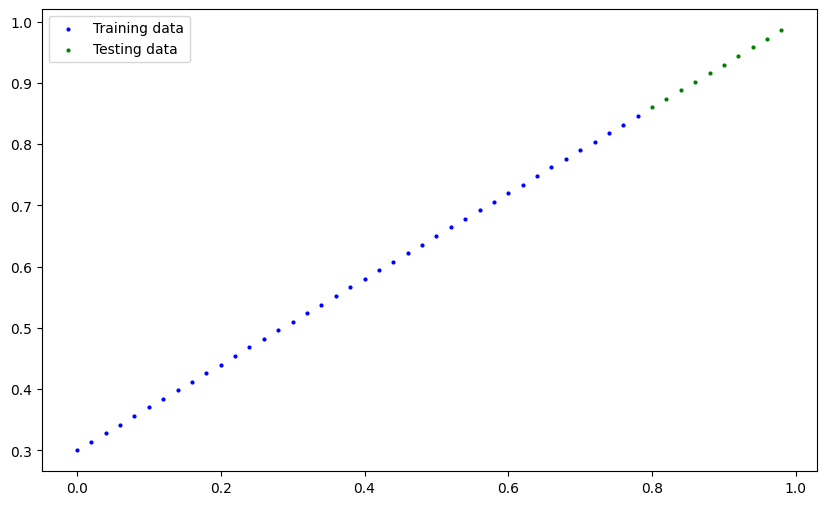

In [112]:
plot_predictions();

# 2. Build Model

## what our model does:
1. Start with random values(weight and bias)
2. Looking at training data and adjust values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

## How does it do so?
Through Two main algos:
1. Gradient Descent (Slope)-> optimization algorithm used to minimize the loss function (error) of a model by updating model parameters (weights and biases).
2. Backpropagation (It's an algorithm for training neural networks that uses gradient descent.)

In [113]:
from torch import nn
class LinearRegressionModel(nn.Module): # <-almost everything in pytorch is inherit from this
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward Method to define computation in the model
  # This function takes input data, processes it through the network's layers, and returns the output.
  def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias

## Pytorch Model building essentials
* torch.nn -> contains all the building blocks for computational graph(nn consider as CG)
* torch.nn.Parameter -> what parameter our model try and learn
* torch.nn.Module -> The base class for all NN modeuls, if you subclass it you should overwrite forward() method
* torch.optim -> where the optimizer s in pytorch live, they will help with gradient descent

## Checking the contents of our pytorch model
 * we can check it using .parameters


In [114]:
# creating a random seed (random numbers).
torch.manual_seed(42)

# creating as=n instance of our model

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [115]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using `torch.inference.mode()`
 how well predcits y_test based on X_test
 when we pass datat through our model, it run it through the `forward()` method

In [116]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [117]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

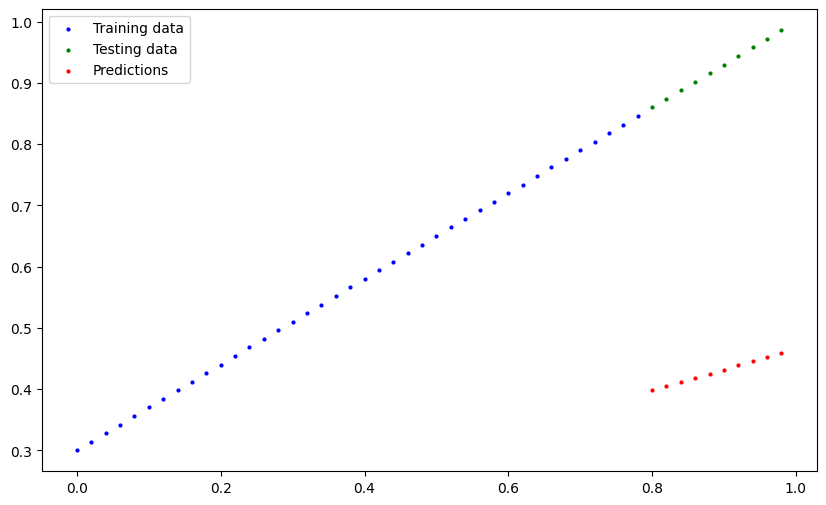

In [118]:
plot_predictions(predictions=y_preds)

# 3. Train Model
The training purpose is for a model to move from some *unknown* parameters (may be random) to some
*known* parameters.
or in other words from a poor representation of data to a better representation of data.

* One way to measure how poor or wrong your model predictions are is to use a loss function.

* `loss function` also called `cost function` that uses a mean square error(MSE).

Things we need to train:

* **Loss Function:** A function to measure how wrong your model predictions are to the ideal outputs , lower is better.

* **Optimizer:**  Takes into account the loss of a model and adjust the models parameters (e.hg weights and bias) **OR** Ann algorithm that adjusts a neural network's parameters (weights and biases) during training to minimize the loss function and improve the model's performance

For pytorch we need:
* A Training Loop
* A Testing Loop


In [119]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [120]:
# Set named parameters(A parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Using loss function `torch.nn.L1Loss()` and optimizer `torch.optim.SGD()`
## Learning Rate (Hyperparameters)
* The small of the lr the small of the chnge n the parameters
* The large of the lr the large of the change in the parameters

lr = 0.01 means if weights = 0.312 then the lr will only change the 0.-1- the 1s value .

In [121]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer (Using the stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate = possibly the most imp hyperparameters.

In [122]:
# All are doing same thing but there is differences.

# list(model_0.parameters())
# list(model_0.eval().parameters())
with torch.inference_mode():
  a = list(model_0.parameters())
a

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

## Building a training loop and a testing loop in pytorch

A couple of things we need in a training loop:
1. loop throgh the data.
2. forward pass (this involvs data moving through our model's `forward()`) also called forward propagation.
3. calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backwards (**backpropagation**)- move backwards to the network to calculate the gradient of each of the parameter of our model wrt loss.
6. optimizer step (**Gradient Descent**)- use the optimizer to adjust our models parameters to try and improve the loss.

In [123]:
torch.manual_seed(42)

# An epoch is one loop through the data..
epochs = 200

# Tracking values
epoch_count = []
loss_values = []
test_loss_values = []

# 1. Loop through the data
for epoch in range(epochs):
  # set the model to training mood.

### Training
  model_0.train()

  # 2. Forward Pass
  y_pred = model_0(X_train)

  # 3. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f'Loss: {loss}')

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. Loss backwards
  loss.backward()

  # 6. Optimizer step (Perform Gradient Descent)
  optimizer.step()


### Testing
  model_0.eval()
  with torch.inference_mode():# turn off the gradient tracking.
    # 1. Farward Pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss:{loss} | Test Loss: {test_loss}')

  print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss:0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('we

*italicized text*# New Section

In [124]:
weight, bias

(0.7, 0.3)

In [125]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

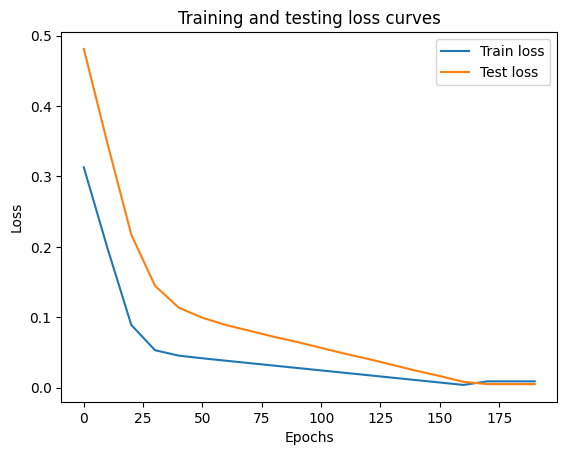

In [126]:
# Plot the loss curves
# Converting tensor into numpy first

import numpy as np
for_train_loss = np.array(torch.tensor(loss_values).cpu().numpy())
for_test_loss = np.array(torch.tensor(test_loss_values).cpu().numpy())

plt.plot(epoch_count, for_train_loss , label='Train loss')
plt.plot(epoch_count, for_test_loss, label='Test loss')
plt.title('Training and testing loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [127]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

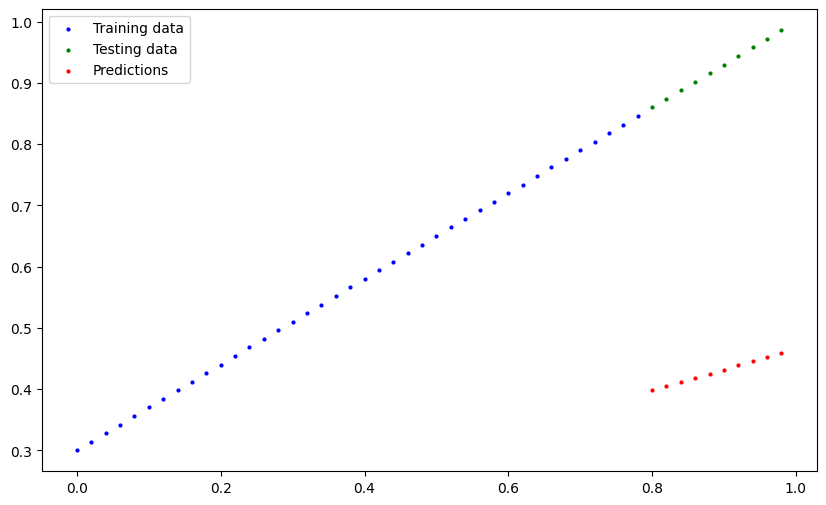

In [128]:
plot_predictions(predictions = y_preds)

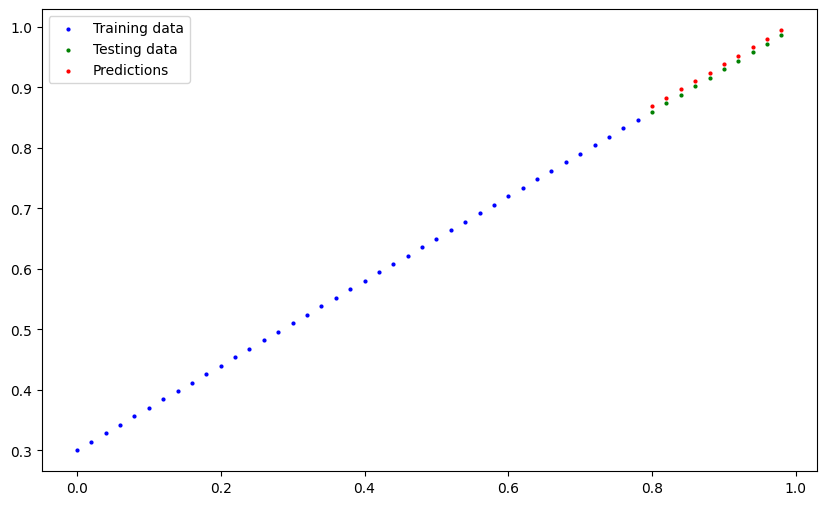

In [129]:
plot_predictions(predictions = y_preds_new)

# Saving a model in Pytorch

there are 3 main methods:
1. `torch.save()` - allows you to save a Pytorch object in Python's pickle formate.

2. `torch.load()` - allows you to load a saved Pytorch object

3. `torch.nn.Module.load_state_dict()` - this allows to load a models saved state dict

In [130]:
# Saving our model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'Pytorch_for_linearRegression.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/Pytorch_for_linearRegression.pth


In [131]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1686 Mar 24 09:29 Pytorch_for_linearRegression.pth


# Loading our saved Model

In [132]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [133]:
# To load in a saved state_dict we have to instantiate a new instance of model class

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [134]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [135]:
# Make some predictions of our loaded Model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [136]:
# Predictions of our original Model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [137]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [138]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [149]:
# setup

device = 'cude' if torch.cuda.is_available() else 'cpu'
print(f'using device : {device}')

using device : cpu


## Data

In [140]:
weight = 0.8
bias = 0.5

start = 0
end = 1
space = 0.05
X = torch.arange(start, end, space).unsqueeze(dim = 1)
y = weight * X + bias

X[:15], y[:15]

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500],
         [0.5000],
         [0.5500],
         [0.6000],
         [0.6500],
         [0.7000]]),
 tensor([[0.5000],
         [0.5400],
         [0.5800],
         [0.6200],
         [0.6600],
         [0.7000],
         [0.7400],
         [0.7800],
         [0.8200],
         [0.8600],
         [0.9000],
         [0.9400],
         [0.9800],
         [1.0200],
         [1.0600]]))

## Training and testing Split

In [141]:
# training and testing split
train_split = int(0.75*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(15, 15, 5, 5)

## Visualizing the data

In [142]:
# plotting

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     preds=None):
  plt.figure(figsize=(10, 6))
  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label = 'testing data')
  if preds is not None:
    plt.scatter(test_data, preds, c='r', s=4, label='predictions')
  plt.legend()

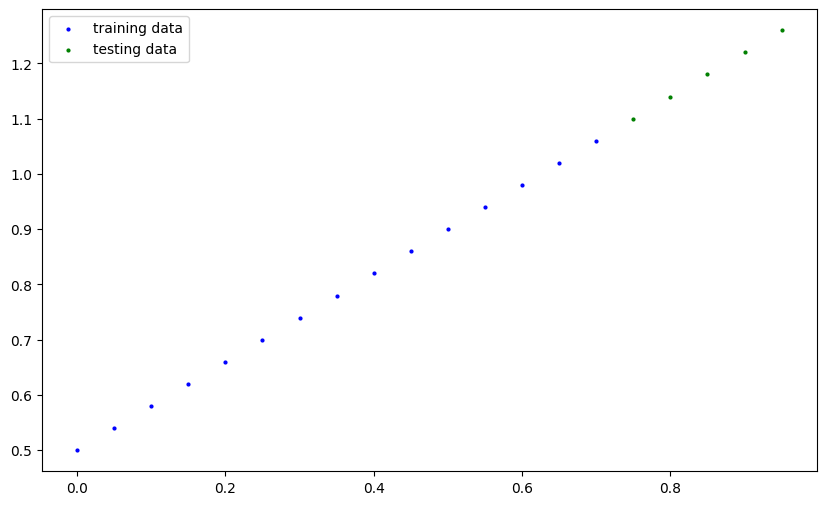

In [143]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a Linear Model

In [154]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [155]:
# checking current device

next(model_1.parameters()).device

device(type='cpu')

In [156]:
# changing devide to gpu
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [157]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Training

1. Loss Function
2. Optimizer
3. Training loop
4. Testing Loop

In [161]:
loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

## Device Agnostic Code

 ALL the things should be in the same device ->
 **device set to be in cpu or gpu according to yours.**
 X_train = X_train.to(device)
 X_test = X_test.to(device)
 y_train = y_train.to(device)
 y_test = y_test.to(device)

In [162]:
torch.manual_seed(42)

epochs = 200

# Device Agnostic Code
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_preds = model_1(X_train) # forwards pass
  loss = loss_fn(y_preds, y_train) # cal the loss
  optimizer.zero_grad() # zero grad
  loss.backward() # backpropagation
  optimizer.step() # steps

  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10  == 0:
    print(f'Epoch {epoch} | Loss {loss} | Test_loss {test_loss}')

Epoch 0 | Loss 0.009866940788924694 | Test_loss 0.11625301837921143
Epoch 10 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 20 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 30 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 40 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 50 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 60 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 70 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 80 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 90 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 100 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 110 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 120 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 130 | Loss 0.009866907261312008 | Test_loss 0.11625301837921143
Epoch 140 | Loss 0.009866907261